<a href="https://colab.research.google.com/github/IlyaNechaev27/DS_project/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# отключим всякие предупреждения Anaconda
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

pd.set_option("display.max.columns", 100)
import pylab as plt

%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (10, 8)

In [19]:
!git clone https://github.com/IlyaNechaev27/DS_project.git

fatal: destination path 'DS_project' already exists and is not an empty directory.


In [26]:
df = pd.read_csv("DS_project/data/shootings.csv")


Проверим, все ли нормально считалось – посмотрим на первые 5 строк

In [27]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


*Размер данных*

In [28]:
print(df.shape)

(4895, 15)


*Название признаков*

In [29]:
print(df.columns.values)

['id' 'name' 'date' 'manner_of_death' 'armed' 'age' 'gender' 'race' 'city'
 'state' 'signs_of_mental_illness' 'threat_level' 'flee' 'body_camera'
 'arms_category']


In [30]:
df.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,White,Guthrie,OK,False,attack,Not fleeing,False,Guns
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,Hispanic,Chandler,AZ,False,attack,Car,False,Guns
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,White,Assaria,KS,False,attack,Not fleeing,False,Guns
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,White,Burlington,IA,False,other,Not fleeing,True,Unarmed
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,Black,Knoxville,PA,False,attack,Not fleeing,False,Other unusual objects


In [37]:
df['age'].describe()

count    4895.000000
mean       36.549750
std        12.694348
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

Описание признаков

|  Название  | Описание | Тип |
|---         |--:       |     |
| **id** | идентификтор | количественный |
| **name** | Имя застреленного человека | строковой |
| **date** | Дата события | дата, формата yyyy-mm-dd format  |
| **manner_of_death** | Каким способом было произведено убийство | строковой |
| **armed** | Вооружение | строковый |
| **age** | Возраст расстрелянного человека | количественный |
| **gender** | Пол расстрелянного человека | качественный
| **race** | Расса растрялянного человека |
| **city** | Город происшествия | строковой |
| **state** |  Штат происшествия | строковой |
| **signs_of_mental_illness** | Признаки психический заболеваний | булевый |
| **threat_level** | Уровень угрозы | строковой |
| **flee** | |
| **body_camera** | Наличие видеокамеры, заснявшей происшествие | булевое |
| **arms_category** | Категория орежия | строковой |

Целевая переменная: **Race** – раса убитого полицией человека, строкой. Потом мы будем строить модели, прогнозирующие этот признак по остальным, поэтому мы и назвали его целевым. 


In [41]:
df['race'].value_counts()

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: race, dtype: int64

Text(0.5, 1.0, 'Распределений по расам людей, убитых полицией')

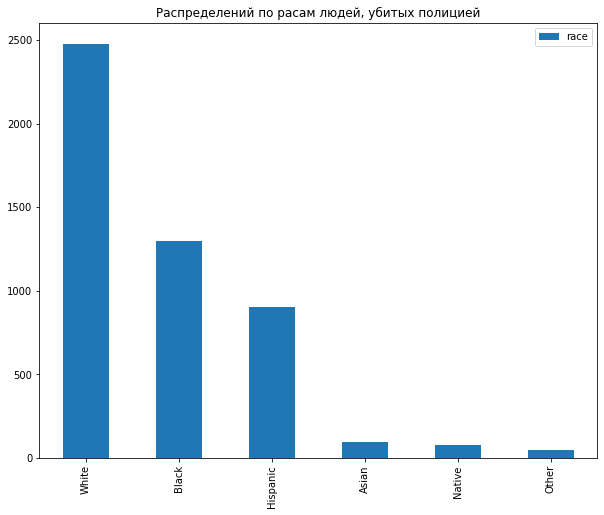

In [47]:
df['race'].value_counts().plot(kind='bar', label='race')
plt.title("Распределений по расам людей, убитых полицией")

In [40]:
df.sort_values(by='age', ascending=True).head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
811,980,Jeremy Mardis,2015-11-03,shot,unarmed,6.0,M,White,Marksville,LA,False,other,Car,True,Unarmed
2761,3229,Kameron Prescott,2017-12-21,shot,unarmed,6.0,M,White,Schertz,TX,False,other,Not fleeing,False,Unarmed
988,1165,Ciara Meyer,2016-01-11,shot,unarmed,12.0,F,White,Penn Township,PA,False,other,Not fleeing,False,Unarmed
1628,1883,Tyre King,2016-09-14,shot,toy weapon,13.0,M,Black,Columbus,OH,False,other,Foot,False,Other unusual objects
2682,3117,Jason Ike Pero,2017-11-08,shot,knife,14.0,M,Native,Odanah,WI,False,other,Not fleeing,False,Sharp objects
